# Bimodal experiments

<h1>Bimodal Experiments</h1>

<p>
<b>Quantitative Big Imaging - ETHZ: 227-0966-00L</b>
<br />
</p>
<br />
<p style="font-size:1em;">May 6, 2021</p>
<br /><br />
<p style="font-size:1.5em;padding-bottom: 0.25em;">Anders Kaestner</p>  
<p style="font-size:1em;">Laboratory for Neutron Scattering and Imaging<br />Paul Scherrer Institut</p>

In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import skimage.io as io
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture
import pandas as pd

plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('default')
sns.set_style("whitegrid", {'axes.grid': False})

## Literature / Useful References

### Books
#### General:
- John C. Russ, "The Image Processing Handbook",(Boca Raton, CRC Press)
 - Available [online](http://dx.doi.org/10.1201/9780203881095) within domain ethz.ch (or proxy.ethz.ch / public VPN) 
 
#### Fusion specific:
- Mitchell, H.B., ["Data Fusion: Concepts and Ideas"](https://www.doi.org/10.1007/978-3-642-27222-6), Springer Verlag, 2012.
- Mitchel, H.B., ["Image Fusion - Theories, Techniques and Applications"](https://www.doi.org/10.1007/978-3-642-11216-4), Springer Verlag, 2010.
- T. Stathaki, ["Image fusion"](https://doi.org/10.1016/B978-0-12-372529-5.X0001-7), Academic Press, 2008
- Goshtasby, A. Ardeshir, ["Image Registration Principles, Tools and Methods"](10.1007/978-1-4471-2458-0), Springer Verlag, 2012


- *Xiao, G., Bavirisetti, D.P., Liu, G., Zhang, X., ["Image Fusion"](https://www.doi.org/10.1007/978-981-15-4867-3), Springer Verlag, to be published July, 2020*
    

## Previously on QBI ...

- Image Enhancment 
 - Highlighting the contrast of interest in images
 - Minimizing Noise
- Understanding image histograms
- Automatic Methods
- Component Labeling
- Single Shape Analysis
- Complicated Shapes
- Dynamic Experiments
- Image registration
- Statistics
- Plotting

## Outline

- Motivation (Why and How?)
- Scientific Goals
- Image fusion
- Bivariate segmentation
- Managing data tables

# Imaging modalities
## Some imaging experiments and their challenges

<table>
<col width="400px" />
<tr><th>Hydrology in soil and geology</th><th>Cultural heritage</th></tr>
<tr>
<td>
<center>
<img src="figures/soil.png" style="height:200px" />
</center>        
    
- Segmentation accuracy
- Estimate water content

</td>
<td>
<center>
<img src="figures/buddha_neutron.png" style="height:200px" />
</center>
    
- Segmentation accuracy
- Material classification
        
</td>  
</tr>
<tr><th>Building materials</th><th>Materials science</th></tr>
<tr>
<td>
<center>    
<img src="figures/CapillaryRise.png" style="height:200px" />
</center>        
    
- Estimate water content
- Dimensional changes

</td>
<td>
<center>    
<img src="figures/weld.png" style="height:200px" />
</center>
    
- Penetration power
- Ambiguous readings
        
</td>  
</tr>
</table>


```{figure} figures/soil.png
---
scale: 50%
---
In the soil the graylevels are often ambiguous.
```

```{figure} figures/buddha_neutron.png
---
scale: 50%
---
Studies of the cultural heritage.
```

```{figure} figures/CapillaryRise.png
---
scale: 50%
---
Dimensional changes in porous media.
```

```{figure} figures/weld.png
---
scale: 50%
---
Material science with material mixes.
```

## Reasons to select an imaging modality?
Reasons to select or reject a specific imaging method
<table>
    <cols width="600px">
<tr>
<th>
    <center>
    <img src="figures/noun_advantage.svg" style="height:100px">
            </center>
</th>    
<th>
         <center><img src="figures/noun_Disadvantage.svg" style="height:100px"></center>
</th></tr>
<tr><td>
    
- Good transmission
- Good contrast
- Relevant features visible
- Materials can be identified
    
</td><td>
    
- Low transmission
- Low contrast
- Not all features visible
- Ambiguous response
    
</td></tr>
</table>

    
Until now, we only collected image features from a single modality.

## The aim of multimodal imaging
### Purpose of multi-modality
Match the advantages of each method against the disadvantages of the other methods to obtain more information than using each method individually.

1. Extend range of operation.
2. Extend spatial and temporal coverage.
3. Reduce uncertainty.
4. Increase reliability.
5. Robust system performance.

<img src="figures/multispectral_goggles.png" style="height:200px" />

```{figure} figures/multispectral_goggles.png
---
---
The multispectral glasses from the movie 'National Treasure'.
```

## The players of an imaging experiment

<img src="figures/imaging_balls.png" style="height:500px" />

```{figure} figures/imaging_balls.png
---
scale: 60%
---
An imaging experiment is only successful when all aspects are considered.
```

## Some considered modalities -  Neutrons and X-rays

In material science it often relevant to combine imagning with neutrons and X-rays. The reason is the complementarity between the two modalities. Simply put, neutrons are often sensitive to low-z materials while x-rays are more sensitive to high-z materials. Combining the two modalities is of particular interest when the sample is a mix of high and low-z materials.
```{figure} figures/camera_neutrons.png
---
scale: 40%
---
```
```{figure} figures/periodicN.png
---
scale: 70%
---
```
```{figure} figures/camera_xrays.png
---
scale: 40%
---
```
```{figure} figures/periodicX.png
---
scale: 70%
---
```

<table>
<cols width="700px" />
<tr><th>Neutrons</th><th>X-rays</th></tr>
<tr>
<td>
<center>
<img src="figures/camera_neutrons.png" style="height:200px" />
</center>        
<center>
<img src="figures/periodicN.png" style="height:400px" />
</center>     
</td>
<td>
<center>
<img src="figures/camera_xrays.png" style="height:200px" />
</center>
    <center>
<img src="figures/periodicX.png" style="height:400px" />
</center>
</td>
</tr>
</table>

## Some considered modalities for medical imaging

Imaging is widely used in medical applications. There are also many different imaging modalities available, each revealing it own particular information.

The modalities also differ in the resolution that can be achived. Therefore, it makes sense to combine the modalities to increase the understanding of provided information.

```{figure} figures/MedicalFusion.jpg
---
scale: 80%
---
Combining different medical imaging modalities.
```

<img src="figures/MedicalFusion.jpg"/>

[Du et al. 2015](https://doi.org/10.1016/j.neucom.2015.07.160)

## Some considered modalities - Grating interferometry

Grating interferometry is an imaging technique that exploits the wave property of the beam. This makes it possible to extract more information than the traditional transmission image. These are
- The phase contrast - measures the phase shift of the beam to provide better contrast than the tranmission in some cases.
- The dark field contrast - is related to the scattered bream and can probe clusters of sample features that a much smaller than the resolution of the imaging system.

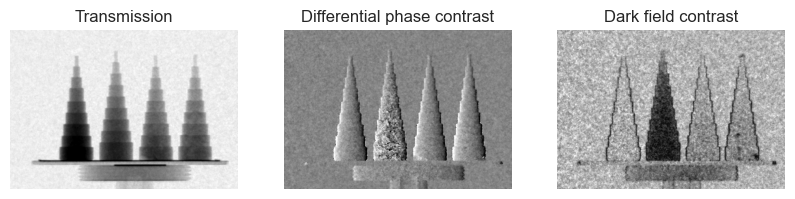

In [3]:
fig,ax=plt.subplots(1,3,figsize=(10,5))
ax[0].imshow(io.imread("figures/nGI_TI.png"));  ax[0].set_title('Transmission');                ax[0].axis('off')
ax[1].imshow(io.imread("figures/nGI_DPC.png")); ax[1].set_title('Differential phase contrast'); ax[1].axis('off')
ax[2].imshow(io.imread("figures/nGI_DFI.png")); ax[2].set_title('Dark field contrast');         ax[2].axis('off');


- Data comparable on pixel level
- Non-linear relation between the variables.
- Improved estimation schemes using iterative process
- Physical interpretation/motivation to fuse?

## Some considered modalities - Spectroscopic imaging
<img src="figures/ES_Fe.png" style="height:400px" />

```{figure} figures/ES_Fe.png
---
scale: 80%
---
Neutron energy scan through a piece of iron.
```

- Material analysis
- Selector calibration

S. Peetermans

## Other modalities and dimensionality
### The information can also be provided as few localized points 
- Single spots
- Surface information
- Single radiographs vs CT data

### to provide

- Temperature
- Flowrate
- Pressure


# Image fusion

# What is data fusion?
## Definition
The theory, techniques and tools which are used for 
- combining sensor data, or data derived from sensory data, 
- into a common representational format.
	
## Aim
To improve the quality of the information, so that it is, in some sense, better than would be possible if the data sources were used individually.


[Mitchell 2012](https://www.doi.org/10.1007/978-3-642-27222-6)

    
## Fusion approaches - no golden recipe
### Fusion strategies

- __Multivariate fusion:__ All data are combined using the same concept.
- __Augmented fusion:__ Modalities have different functions in the fusion process.
- __Artifact reduction by fusion:__ The second modality can be used to fill in the blanks.
- __Combination:__ A single fusion method may not give the final result - combination 

### Select strategy
The fusion strategy determined by:

- Sample composition 
- Experiment objectives 
- Condition of the data


## Levels of fusion

<table>
    <tr><th>Input</th><th>Output</th><th>Description</th></tr>
    <tr><td>Data</td><td>Data</td><td>Input data is smoothed/filtered/segmented</td></tr>
    <tr><td>Data</td><td>Feature</td><td>The pixels are reduced to features using multiple sources.</td></tr>
    <tr><td>Feature</td><td>Feature</td><td>Input features are reduced in number, <br /> or new features are generated by fusing input features.</td></tr>
    <tr><td>Feature</td><td>Decision</td><td>Input features are fused together to give output decision.</td></tr>
    <tr><td>Decision</td><td>Decision</td><td>Multiple input decisions are fused together <br/>to give a final output decision. e.g. Random forest</td></tr>
</table>

# Image fusion workflow

Image fusion is the process to combine images from different modalities with the aim to enhance the information compared the images individually. This process has serveral steps and the fusion can be done on several levels of abstraction.

```{figure} figures/imagefusion_process.pdf
---
scale: 100%
---
Flow chart showing how image fusion can be done
```

<img src="figures/imagefusion_process.svg" style="height:800px" />

[Mitchel, 2010](https://www.doi.org/10.1007/978-3-642-11216-4), 
[Goshtasby, 2012](https://www.doi.org/10.1007/978-1-4471-2458-0)

## Catastrophic fusion
### Definition
The combination perform worse than the individual modalities.


Catastrofic fusion can be caused by:
- Selection of the wrong variables.
- Too complex combination.
- Sensor information canceling each other.

<img src="figures/bad_soup.png" style="height:300px" />

```{figure} figures/bad_soup.png
---
scale: 50%
---
More chefs don't always mean better soup, the same applies to data fusion. Chose your source combination and fusion metods carefully.
```

## Image registration
From last weeks lecture: A series of affine transformations to bring images on the same grid.

### The process

<img src="figures/registration.svg" style="height:600px" />


```{figure} figures/registration.pdf
---
scale: 100%
---
Registration optimizes the scale, rotation, and position of an image compared to a fixed reference. 
```

## Registration considerations
Registration is an optimization problem with many local minima.

### Manual or guided registration
- Perform the full transformation manually
- Identify land marks, points, lines, planes
- Provide a coarse preregistration

### Automatic registration 
- Iterative process 
- Metrics
- Multi-modality loose common landmarks 

[Goshtasby, 2012](https://www.doi.org/10.1007/978-1-4471-2458-0)

# Qualitative fusion: Registration and covisualization
Use e.g. VG Studio or 3DSlicer to 

- Register data sets
- Interactive guided segmentation of the separate data sets.


<table>
<cols width="700px" />
<tr><th>Neutrons</th><th>X-rays</th></tr>
<tr>
<td>
<center>
<img src="figures/swordN.png" style="height:300px" />
</center>            
</td>
<td>
<center>
<img src="figures/swordX.png" style="height:300px" />
</center>
</td>
</tr>
</table>


mannes2015_NXCultHer


## Let's load some test data

In [ ]:
# Get images from volume, works only locally. Data too large for repos.
N=400
imgAFull = io.imread('/data/P20151041/04_evaluation/shell_N_final_transform.tiff')
imgBFull = io.imread('/data/P20151041/04_evaluation/shell_X.tiff')
imgA=imgAFull[N]
imgB=imgBFull[N]
np.save('../common/data/shellN.npy',imgA)
np.save('../common/data/shellX.npy',imgB)

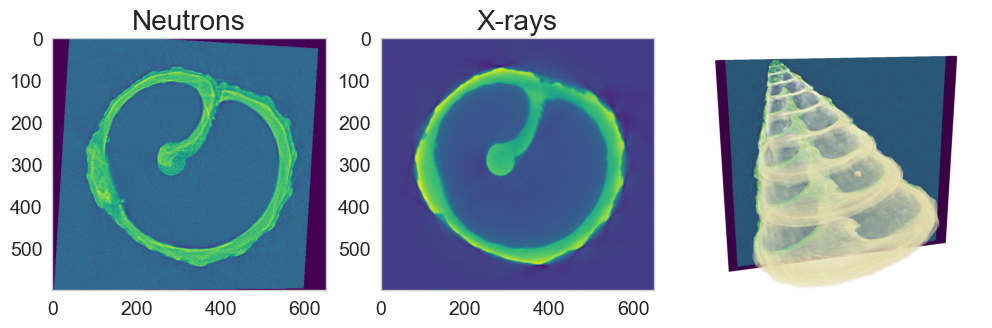

In [31]:
imgA=np.load('data/shellN.npy')
imgB=np.load('data/shellX.npy')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
ax1.imshow(imgA,cmap='viridis'), ax1.set_title('Neutrons')
ax2.imshow(imgB,cmap='viridis'), ax2.set_title('X-rays');
ax3.imshow(plt.imread('figures/snailshellNeutron.png')); ax3.axis('off');

## Visualization techniques - Checker board


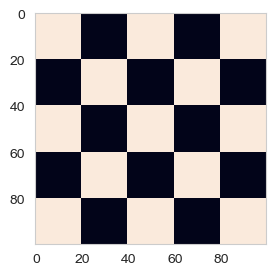

In [5]:
def checkerBoard(imgA,imgB,tiles=10) :
    if imgA.shape != imgB.shape :
        raise Exception('Image have different sizes')
    
    dims     = imgA.shape
    tileSize = (dims[0]//tiles,dims[1]//tiles)
    
    mix = np.zeros(dims)
    
    for r in np.arange(0,tiles) :
        for c in np.arange(0,tiles) : 
            if (c+r) % 2 : 
                mix[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]= imgB[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]
            else : 
                mix[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]= imgA[(r*tileSize[0]):((r+1)*tileSize[0]),(c*tileSize[1]):((c+1)*tileSize[1])]

    return mix
plt.figure(figsize=(3,3))
plt.imshow(checkerBoard(np.ones((100,100)),np.zeros((100,100)),tiles=5),interpolation='none');

### Try checker board with images

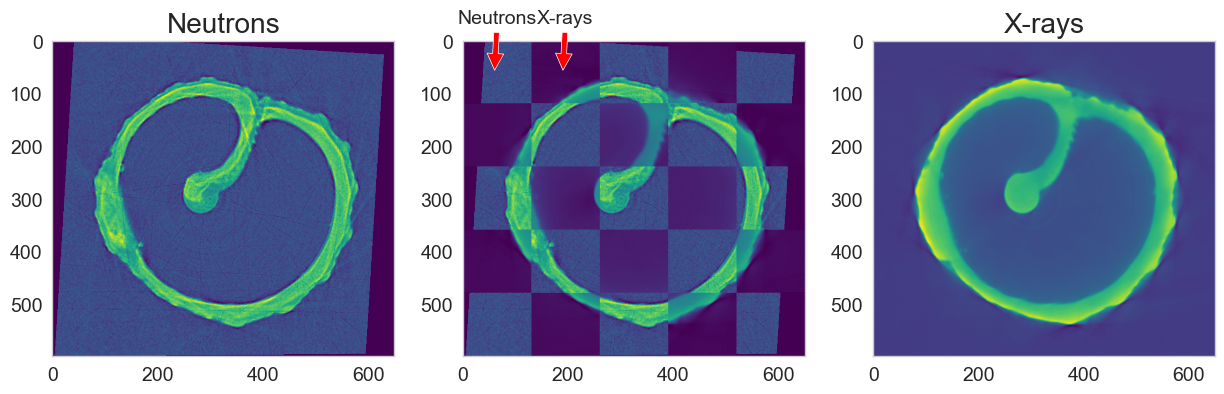

In [33]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
ax1.imshow(imgA,cmap='viridis',vmin=10000,vmax=60000), ax1.set_title('Neutrons')
ax2.imshow(checkerBoard(imgA,imgB,tiles=5),cmap='viridis',vmin=10000,vmax=60000); 
ax2.annotate('Neutrons',
            xy=(60, 60), xycoords='data',
            xytext=(0.1, 1.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
ax2.annotate('X-rays',
            xy=(190, 60), xycoords='data',
            xytext=(0.3, 1.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
ax3.imshow(imgB,cmap='viridis'), ax3.set_title('X-rays');

## Visualization techniques - Color chanel mixing
With two or more modalities, we can visualize the mix using the RGB color channels:

$$
\begin{eqnarray}
R &=& modality_A\\
G &=& modality_B\\
B &=& \frac{modality_A+modality_B}{2}
\end{eqnarray}
$$
some intensity scaling may be needed for best result.

In [34]:
def channelMix(imgA,imgB, order=(0,1,2)) :
    imgAN=(imgA-imgA.min())/(imgA.max()-imgA.min())
    imgBN=(imgB-imgB.min())/(imgB.max()-imgB.min())
    
    rgb=np.zeros((imgA.shape[0],imgA.shape[1],3));
    rgb[:,:,order[0]]=imgAN
    rgb[:,:,order[1]]=imgBN
    rgb[:,:,order[2]]=0.5*(imgAN+imgBN)
    
    return rgb

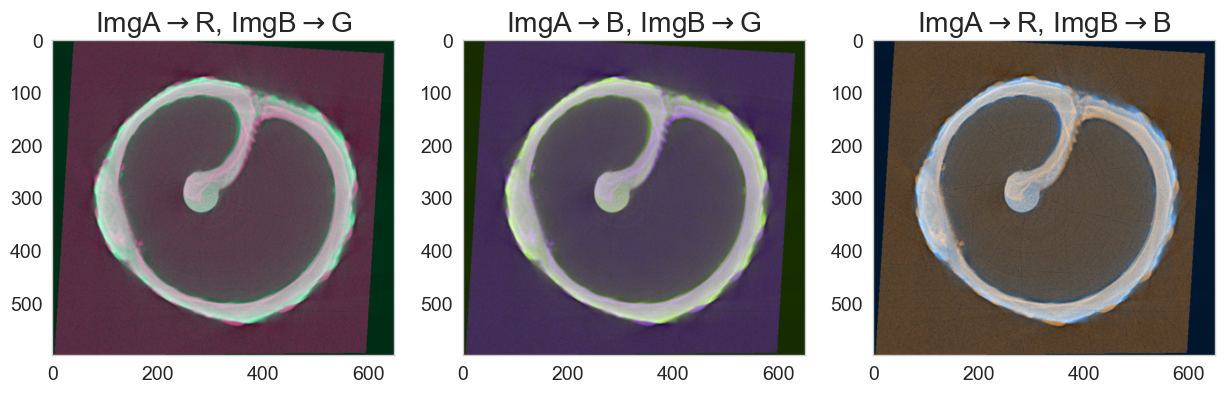

In [35]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
ax1.imshow(channelMix(imgA,imgB,order=(0,1,2))), ax1.set_title(r'ImgA$\rightarrow$R, ImgB$\rightarrow$G');
ax2.imshow(channelMix(imgA,imgB,order=(2,1,0))), ax2.set_title(r'ImgA$\rightarrow$B, ImgB$\rightarrow$G');
ax3.imshow(channelMix(imgA,imgB,order=(0,2,1))), ax3.set_title(r'ImgA$\rightarrow$R, ImgB$\rightarrow$B');

# Bimodal segmentation

## Histogram of single modality

<img src="figures/overlapping_classesA.png" style="height:500px">


## Individual histograms of two modalities

<table>
<cols width="700px" />
<tr><th>Modality A</th><th>Modality B</th></tr>
<tr>
<td>
<center>
<img src="figures/overlapping_classesA.png" style="height:500px" />
</center>            
</td>
<td>
<center>
<img src="figures/overlapping_classesB.png" style="height:500px" />
</center>
</td>
</tr>
</table>


## Bivariate histogram
<img src="figures/bivariate_classes.png" style="height:600px" />

### Example: Roots in soil
<img src="figures/root_slices.svg" style="height:500px"/>

### Bivariate histogram of roots
<img src="figures/root_histogram.png" style="height:500px" />

## Classification methods
### Data
- Images from $M$ modalities $f_1, \ldots, f_M$
- Registered
- Artifact corrected

### Classes
The $N$ classes are described by: 
$$\begin{eqnarray}
\mathcal{H}_1 : p(\mathbf{\mu}_1,\Sigma_1)\nonumber\\
\mathcal{H}_2 : p(\mathbf{\mu}_2,\Sigma_2)\nonumber\\
\vdots\nonumber\\
\mathcal{H}_N : p(\mathbf{\mu}_N,\Sigma_N)\nonumber
\end{eqnarray}
$$


[Duda, Hart, and Stork, 2001](https://www.wiley.com/en-us/Pattern+Classification%2C+2nd+Edition-p-9781118586006)

## Gaussian mixture model

With Gaussian distribution we can describe the bivariate histogram using:
$$p(\theta)=\sum_{1}^{N} \phi\,\mathcal{N}(\mathbf{\mu}_i,\Sigma_i) $$

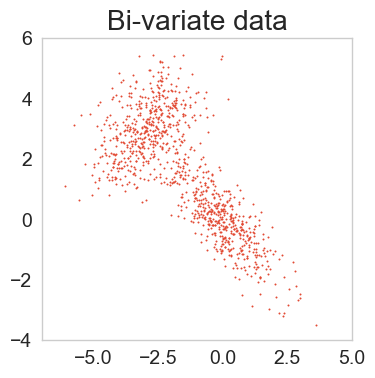

In [36]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C1 = np.array([[1, -0.5], [-0.5, 1]])
C2 = np.array([[1, 0.25], [0.25, 1]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C1), np.dot(np.random.randn(n_samples, 2),C2) + np.array([-3, 3])]

plt.figure(figsize=[4,4])
plt.scatter(X[:,0],X[:,1],0.8)
plt.xlim(-7., 5.),plt.ylim(-4., 6.)
plt.title('Bi-variate data');

In [37]:
def plot_results(X, Y_, means, covariances, title, ax, showShape=True, showCenter=False):
    color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
    
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        ax.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        if showShape :
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ax.add_artist(ell)
            
        if showCenter :
            ax.plot(mean[0],mean[1],'ro')

    ax.set_xlim(-7., 5.)
    ax.set_ylim(-4., 6.)
    ax.set_title(title)


### Gaussian mixture model fitting

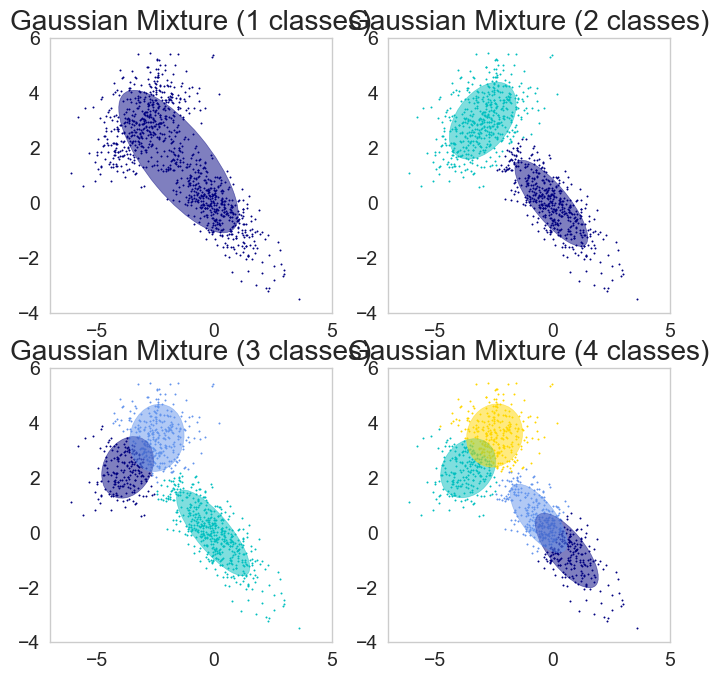

In [38]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
# Fit a Gaussian mixture with EM using five components
for i,ax in zip(np.arange(0,len(axes.ravel())),axes.ravel()) :
    gmm = mixture.GaussianMixture(n_components=i+1, covariance_type='full').fit(X)

    plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             title='Gaussian Mixture ({} classes)'.format(i+1), ax=ax)


# Classification distances 
For a set of multivariate normal distributions $p_i=\mathcal{N}(\mu_i,\Sigma_i)$

We can find the nearest neighbor class using the following distances
#### Euclidean
Distance between two points
$$D_{E}=\sqrt{(x-\mu_1)^T \cdot (x-\mu_1)} $$

#### Mahanalubis
Distance from class $i$ to point $x$
$$D_M=\sqrt{\left(x-\mu_i\right)^T \Sigma_i \left(x-\mu_i\right)}$$

#### Bhattacharia
Distance between two classes 
$$D_B=\frac{1}{8}\left(\mu_1-\mu_2\right)^T \Sigma \left(\mu_1-\mu_2\right) + \frac{1}{2}\ln\left(\frac{|\Sigma|}{\sqrt{|\Sigma_1|\cdot|\Sigma_2|}}\right)\qquad \Sigma=\frac{\Sigma_1+\Sigma_2}{2}$$


Assign the point to the class with shortest distance.


# Graphical presentation of different distances

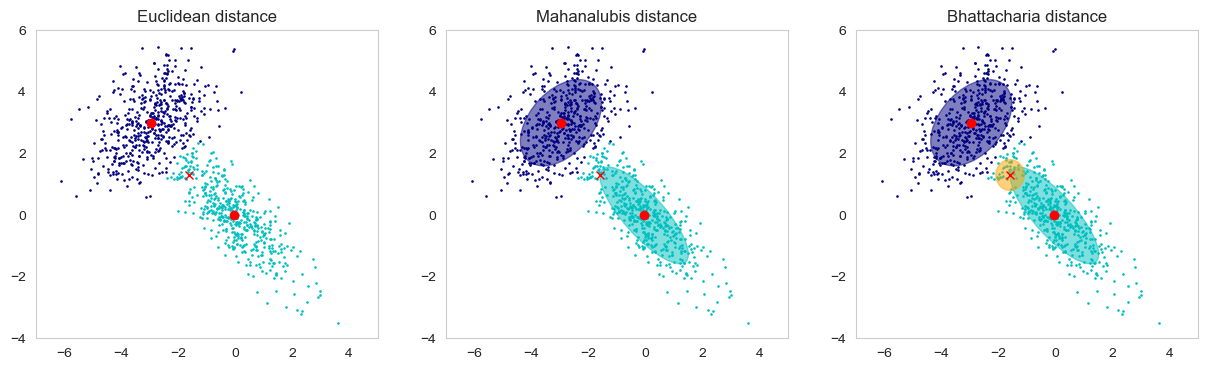

In [56]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X)
m=[-1.6,1.3]
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Euclidean distance',ax1, showShape=False,showCenter=True)
ax1.plot(-1.6,1.3,'rx')
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Mahanalubis distance'.format(2),ax2, showCenter=True)
ax2.plot(-1.6,1.3,'rx')

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Bhattacharia distance'.format(2),ax3, showCenter=True)
v=1
ell = mpl.patches.Ellipse(m, v, v, 0, color='orange')
ell.set_clip_box(ax3.bbox)
ell.set_alpha(0.5)
ax3.add_artist(ell)
ax3.plot(m[0],m[1],'rx');

## Segmentation by Euclidean distance
<img src="figures/roots_segmentation.svg" style="height:300px" />

kaestner2016_itmnrnx

# Bivariate estimation: Working with attenuation coefficients

### Beer-Lamberts law

$$ I=I_0\,e^{-\frac{\rho}{A}\,N_A\,\sigma\,x} $$
- $\rho$ Material denstity
- $A$ Atomic weight
- $\sigma$ microscopic cross section
     - Probability of interaction
     - modality dependent

- $x$ propagation length

### Equation system

$$
\begin{eqnarray}
\sum_{i=1}^{N}\,\Sigma_i\,x_i&=&q_N\nonumber\\
\sum_{i=1}^{N}\,\mu_i\,x_i&=&q_X
\end{eqnarray}
$$
- attn coeff known $\rightarrow$ estimate lengths.
- More pixels $\rightarrow$ more materials.



# Some software engineering

- Unit testing
- Working with repositories
- Contiuous integration

## Unit Testing

In computer programming, unit testing is a method by which individual units of source code, sets of one or more computer program modules together with associated control data, usage procedures, and operating procedures, are tested to determine if they are fit for use.

 - Intuitively, one can view a unit as the smallest testable part of an application
 - Unit testing is possible with every language
 - Most (Java, C++, Matlab, R, Python) have built in support for automated testing and reporting

[Computational science: ... Error](http://doi.org/10.1038/467775a)

## Unit Testing - design
The first requirement for unit testing to work well is to have your code divided up into small independent parts (functions)
### What to test?
 - Each part can then be tested independently (unit testing)
     - If the tests are well done, units can be changed and tested independently
     - Makes upgrading or expanding tools _easy_
 - The entire path can be tested (integration testing)
     - Catches mistakes in integration or _glue_

### How to test
- The _happy path_ - check what it is supposed to do
- To __provoke__ your code - provide data that will fail execution

### Test data
Ideally with realistic but simulated test data

<div class="alert alert-success">
<center>The utility of the testing is only as good as the tests you make</center>
</div>

## Example
Given the following function
```function vxCnt=countVoxs(inImage)```

We can write the following tests:

#### _testEmpty2d_ 
```assert countVoxs(zeros(3,3)) == 0```

#### testEmpty3d
```assert countVoxs(zeros(3,3,3)) == 0```

#### testDiag2d
```assert countVoxs(eye(3)) == 3```

## Unit Testing: Example
Given the following function
```function shapeTable=shapeAnalysis(inImage)```

We should decompose the function into sub-components with single tasks:

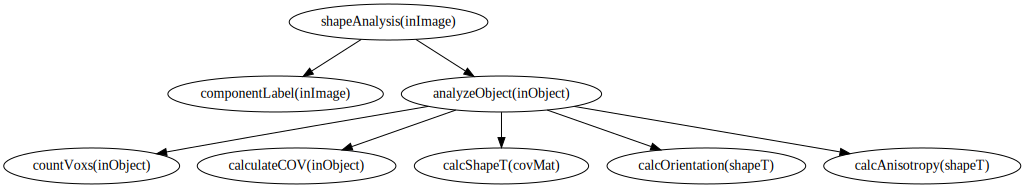

In [40]:
from graphviz import Digraph
dot = Digraph()
dot.edge('shapeAnalysis(inImage)', 'componentLabel(inImage)'), dot.edge('shapeAnalysis(inImage)', 'analyzeObject(inObject)')
dot.edge('analyzeObject(inObject)','countVoxs(inObject)'),     dot.edge('analyzeObject(inObject)','calculateCOV(inObject)')
dot.edge('analyzeObject(inObject)','calcShapeT(covMat)'),      dot.edge('analyzeObject(inObject)','calcOrientation(shapeT)')
dot.edge('analyzeObject(inObject)','calcAnisotropy(shapeT)')
dot

## Unit Testing in Python

### PyTest
Packages like PyTest are 
- well suited for larger projects 
- you make a set of specific tests for each module 
- run each time the project is updated. 

## Unit testing examples from Scikit Image
https://github.com/scikit-image/scikit-image/tree/master/skimage

- [Test Watershed](https://github.com/scikit-image/scikit-image/blob/16d3fd07e7d882d7f6b74e8dc4028ff946ac7e63/skimage/morphology/tests/test_watershed.py#L79)

- [Test Connected Components](https://github.com/scikit-image/scikit-image/blob/16d3fd07e7d882d7f6b74e8dc4028ff946ac7e63/skimage/morphology/tests/test_ccomp.py#L13)

```python
class TestWatershed(unittest.TestCase):
    eight = np.ones((3, 3), bool)

    def test_watershed01(self):
        "watershed 1"
        data = np.array([[0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0],
                               [0, 1, 1, 1, 1, 1, 0],
                               [0, 1, 0, 0, 0, 1, 0],
                               [0, 1, 0, 0, 0, 1, 0],
                               [0, 1, 0, 0, 0, 1, 0],
                               [0, 1, 1, 1, 1, 1, 0],
                               [0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0]], np.uint8)
        markers = np.array([[ -1, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 1, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0]],
                                 np.int8)
        out = watershed(data, markers, self.eight)
        expected = np.array([[-1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1, -1],
                      [-1,  1,  1,  1,  1,  1, -1],
                      [-1,  1,  1,  1,  1,  1, -1],
                      [-1,  1,  1,  1,  1,  1, -1],
                      [-1,  1,  1,  1,  1,  1, -1],
                      [-1,  1,  1,  1,  1,  1, -1],
                      [-1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1, -1]])
        error = diff(expected, out)
        assert error < eps
```

## Unit testing in python - DocTests

Keep the tests in the [code itself](https://github.com/scikit-image/scikit-image/blob/16d3fd07e7d882d7f6b74e8dc4028ff946ac7e63/skimage/filters/thresholding.py#L886): 

```python
def apply_hysteresis_threshold(image, low, high):
    """Apply hysteresis thresholding to `image`.
    This algorithm finds regions where `image` is greater than `high`
    OR `image` is greater than `low` *and* that region is connected to
    a region greater than `high`.
    Parameters
    ----------
    image : array, shape (M,[ N, ..., P])
        Grayscale input image.
    low : float, or array of same shape as `image`
        Lower threshold.
    high : float, or array of same shape as `image`
        Higher threshold.
    Returns
    -------
    thresholded : array of bool, same shape as `image`
        Array in which `True` indicates the locations where `image`
        was above the hysteresis threshold.
    Examples
    --------
    >>> image = np.array([1, 2, 3, 2, 1, 2, 1, 3, 2])
    >>> apply_hysteresis_threshold(image, 1.5, 2.5).astype(int)
    array([0, 1, 1, 1, 0, 0, 0, 1, 1])
    References
    ----------
    .. [1] J. Canny. A computational approach to edge detection.
           IEEE Transactions on Pattern Analysis and Machine Intelligence.
           1986; vol. 8, pp.679-698.
           DOI: 10.1109/TPAMI.1986.4767851
    """
    low = np.clip(low, a_min=None, a_max=high)  # ensure low always below high
    mask_low = image > low
    mask_high = image > high
```

## Unit Testing with Jupyter
Working primarily in notebooks makes regular testing more difficult but not impossible. If we employ a few simple tricks we can use doctesting seamlessly inside of Jupyter. We can make what in python is called an annotatation to setup this code. 

In [41]:
import doctest
import copy
import functools

def autotest(func):
    globs = copy.copy(globals())
    globs.update({func.__name__: func})
    doctest.run_docstring_examples(
        func, globs, verbose=True, name=func.__name__)
    return func

### A very simple test
This test will be used in a jupyter notebook.

It is implemented as a DocTest. The function is supposed to return five added to the input value. The test is implemented for the specific case with the input '5' and we expect the function to return 10.

In [42]:
@autotest
def add_5(x):
    """
    Function adds 5
    >>> add_5(5)
    10
    """
    return x+5

Finding tests in add_5
Trying:
    add_5(5)
Expecting:
    10
ok


The test returned 10 and DocTest concludes that the test passed with an 'ok'. This is a very simple function that already assumes you enter a number, but what would happen if we call the function with a string of a complicated object of some kind? The function should be extended with checks if the correct data type is provided, which in turn would require further tests to verify that the functionality under these conditions. 

### Testing an image processing algorithm

Numerical algorithms are often hard to check with unit tests. In particular, when noise is added. You can however always test the basic functionality. Below we have an example that tests wether the label function does what it is supposed to do:
1. A single object -  labels 0 and 1
2. Break the object in two - labels 0-2

In [43]:
from skimage.measure import label
import numpy as np
@autotest
def simple_label(x):
    """
    Label an image
    >>> test_img = np.eye(3)
    >>> test_img
    array([[1., 0., 0.],
           [0., 1., 0.],
           [0., 0., 1.]])
    >>> simple_label(test_img)
    array([[1, 0, 0],
           [0, 1, 0],
           [0, 0, 1]])
    >>> test_img[1,1] = 0
    >>> simple_label(test_img)
    array([[1, 0, 0],
           [0, 0, 0],
           [0, 0, 2]])
    """
    return label(x)

Finding tests in simple_label
Trying:
    test_img = np.eye(3)
Expecting nothing
ok
Trying:
    test_img
Expecting:
    array([[1., 0., 0.],
           [0., 1., 0.],
           [0., 0., 1.]])
ok
Trying:
    simple_label(test_img)
Expecting:
    array([[1, 0, 0],
           [0, 1, 0],
           [0, 0, 1]])
ok
Trying:
    test_img[1,1] = 0
Expecting nothing
ok
Trying:
    simple_label(test_img)
Expecting:
    array([[1, 0, 0],
           [0, 0, 0],
           [0, 0, 2]])
ok


### Unit Testing Matlab
https://www.mathworks.com/help/matlab/matlab-unit-test-framework.html


## Test Driven Programming

Test Driven programming is a style or approach to programming where 
1. _the tests are written before the functional code_. 
2. The tests are like very concrete specifications. 
3. It is easy to estimate project progress since you can automatically see how many of the tests have been passed.

You and your collaborators are clear on the utility of the system.

1. shapeAnalysis must give an anisotropy of 0 when we input a sphere
1. shapeAnalysis must give the center of volume within 0.5 pixels
1. shapeAnalysis must run on a 1000x1000 image in 30 seconds

## Using repositories
A repository is (simply put) a backup system tailored to the needs of software development.

- Synchronizes multiple versions
- Manages development branches
- Located on a centralized server


### Why should I use a repository?
- It makes it easy to got back to earlier versions
- It is good for reproducibility
- Makes bug tracking easier
- Easier for a team to work on the same code (without disturbing each other)


### Different repository frameworks
- __Git__
- Azure
- Subversion
- CVS

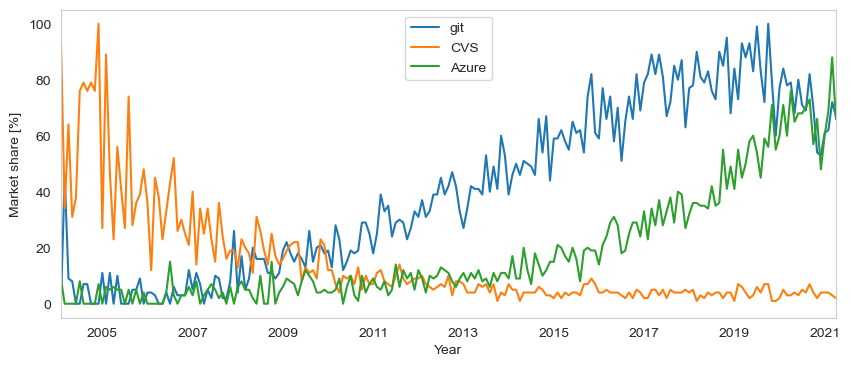

In [58]:
fig,ax=plt.subplots(1,1,figsize=(10,4))
repodf = pd.read_csv('data/repository_popularity.csv',parse_dates=['Date'],index_col=['Date'])
repodf.plot(ax=ax);
ax.set_xlabel('Year');
ax.set_ylabel('Market share [%]');

### Git servers
There are many servers available. These services include 
- Repository
- Issue tracking 
- Project management (Kanban tables etc.)

__Public__
- [GitHub](https://www.github.com)
- [GitLab](https://www.gitlab.com)
- [BitBucket](https://bitbucket.org/)

__Local__
- [ETH GitLab](https://gitlab.ethz.ch)



## Repository workflows
- Single branch (like a backup server withh comments)
- Multiple branches (Recommended)
<img src='figures/RepositoryNetwork.png' style="height:400px"/>

[GitHub tutorials](https://guides.github.com)

## Continuous Integration
Conntinuous integration is the process of running tests automatically everytime changes are made. 

This is possible to setup inside of many IDEs and is offered as a commercial service from companies like CircleCI and Travis. 

We use them for the QBI course to make sure all of the code in the slides are correct. 

Projects like scikit-image use them to ensure changes that are made do not break existing code without requiring manual checks

# Summary

## Multiple modalities
- Add more information to improve the conclusions
- Add component in the analysis and visualization
- Data fusion can be done on different levels of abstraction.

## Software engineering
- Unit testing
- Working with repositories
- Contiuous integration